In [140]:
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import io

from io import BytesIO
from zipfile import ZipFile
import requests
from urllib.request import urlopen

#https://stackoverflow.com/questions/9419162/download-returned-zip-file-from-url/51292933

In [168]:
maxurl = "http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=023034&p_c=-106121997&p_nccObsCode=122&p_startYear=2021"            
minurl = "http://www.bom.gov.au/jsp/ncc/cdio/weatherData/av?p_display_type=dailyZippedDataFile&p_stn_num=023034&p_c=-106122193&p_nccObsCode=123&p_startYear=2021"


In [169]:
r = requests.get(maxurl)
z = zipfile.ZipFile(io.BytesIO(r.content))

files = z.namelist()
amax = pd.read_csv(z.open(files[0]))


In [170]:
r = requests.get(minurl)
z = zipfile.ZipFile(io.BytesIO(r.content))

files = z.namelist()
amin = pd.read_csv(z.open(files[0]))


In [171]:
amin.head(1)

,Product code,Bureau of Meteorology station number,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality
0,IDCJAC0011,23034,1955,1,1,NaN,NaN,NaN


In [172]:
amax.head(1)

,Product code,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality
0,IDCJAC0010,23034,1955,1,1,NaN,NaN,NaN


In [70]:
amax.describe()

,Bureau of Meteorology station number,Year,Month,Day,Maximum temperature (Degree C),Days of accumulation of maximum temperature
count,24199.0,24199.000000,24199.000000,24199.000000,24152.000000,24151.0
mean,23034.0,1987.627712,6.505806,15.728005,21.553867,1.0
std,0.0,19.126351,3.453677,8.800659,6.323200,0.0
min,23034.0,1955.000000,1.000000,1.000000,9.800000,1.0
25%,23034.0,1971.000000,4.000000,8.000000,16.400000,1.0
50%,23034.0,1988.000000,7.000000,16.000000,20.400000,1.0
75%,23034.0,2004.000000,10.000000,23.000000,25.400000,1.0
max,23034.0,2021.000000,12.000000,31.000000,45.800000,1.0


In [7]:
print(amin.shape), print(amax.shape)

(24200, 8)
(24199, 8)


(None, None)

In [76]:
ade = amin.merge(amax, how="inner", on=["Year","Month","Day"])

In [77]:
ade.head(1)

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality_x,Product code_y,Bureau of Meteorology station number_y,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality_y
0,IDCJAC0011,23034,1955,1,1,NaN,NaN,NaN,IDCJAC0010,23034,NaN,NaN,NaN


In [78]:
ade.shape

(24199, 13)

In [79]:
ade = ade.dropna(subset=["Minimum temperature (Degree C)"])

In [80]:
ade.shape

(24145, 13)

In [81]:
ade.head(1)

,Product code_x,Bureau of Meteorology station number_x,Year,Month,Day,Minimum temperature (Degree C),Days of accumulation of minimum temperature,Quality_x,Product code_y,Bureau of Meteorology station number_y,Maximum temperature (Degree C),Days of accumulation of maximum temperature,Quality_y
46,IDCJAC0011,23034,1955,2,16,16.1,NaN,Y,IDCJAC0010,23034,24.0,NaN,Y


In [87]:
ade.dtypes

Product code_x                                  object
Bureau of Meteorology station number_x           int64
Year                                             int64
Month                                            int64
Day                                              int64
Minimum temperature (Degree C)                 float64
Days of accumulation of minimum temperature    float64
Quality_x                                       object
Product code_y                                  object
Bureau of Meteorology station number_y           int64
Maximum temperature (Degree C)                 float64
Days of accumulation of maximum temperature    float64
Quality_y                                       object
dtype: object

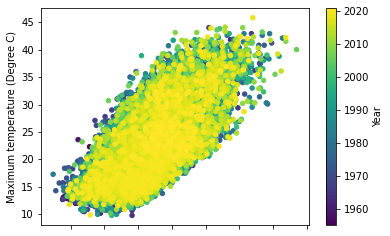

In [90]:
ax2 = ade.plot.scatter(x='Minimum temperature (Degree C)',y='Maximum temperature (Degree C)',c='Year',colormap="viridis")

In [94]:
adeG = ade.groupby(['Year','Month']).mean()

In [95]:
adeG

Bureau of Meteorology station number_x   Day  \
Year Month                                                 
1955 2                                     23034.0  22.0   
     3                                     23034.0  16.0   
     4                                     23034.0  15.5   
     5                                     23034.0  16.0   
     6                                     23034.0  15.5   
...                                            ...   ...   
2020 12                                    23034.0  16.0   
2021 1                                     23034.0  16.0   
     2                                     23034.0  14.5   
     3                                     23034.0  16.0   
     4                                     23034.0   1.5   

            Minimum temperature (Degree C)  \
Year Month                                   
1955 2                           14.569231   
     3                           13.990323   
     4                           10.906667   
     5                            8.600000   
     6                            8.440000   
...                                    ...   
2020 12                          14.706452   
2021 1                           16.648387   
     2                           15.957143   
     3                           14.300000   
     4                           12.800000   

            Days of accumulation of minimum temperature  \
Year Month                                                
1955 2                                              1.0   
     3                                              1.0   
     4                                              1.0   
     5                                              1.0   
     6                                              1.0   
...                                                 ...   
2020 12                                             1.0   
2021 1                                              1.0   
     2                                              1.0   
     3                                              1.0   
     4                                              1.0   

            Bureau of Meteorology station number_y  \
Year Month                                           
1955 2                                     23034.0   
     3                                     23034.0   
     4                                     23034.0   
     5                                     23034.0   
     6                                     23034.0   
...                                            ...   
2020 12                                    23034.0   
2021 1                                     23034.0   
     2                                     23034.0   
     3                                     23034.0   
     4                                     23034.0   

            Maximum temperature (Degree C)  \
Year Month                                   
1955 2                           25.900000   
     3                           25.274194   
     4                           21.840000   
     5                           16.729032   
     6                           15.196667   
...                                    ...   
2020 12                          25.548387   
2021 1                           27.896774   
     2                           26.285714   
     3                           24.990323   
     4                           31.850000   

            Days of accumulation of maximum temperature  
Year Month                                               
1955 2                                              1.0  
     3                                              1.0  
     4                                              1.0  
     5                                              1.0  
     6                                              1.0  
...                                                 ...  
2020 12                                             1.0  
2021 1                                  

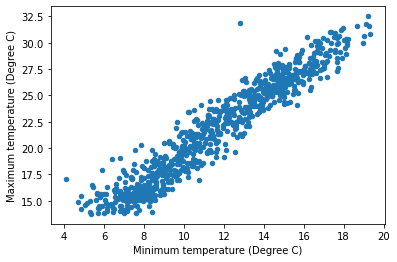

In [97]:
ax3 = adeG.plot.scatter(x='Minimum temperature (Degree C)',y='Maximum temperature (Degree C)',colormap="viridis")

In [98]:
adeG = adeG.add_suffix('_Mean').reset_index()

In [99]:
adeG

,Year,Month,Bureau of Meteorology station number_x_Mean,Day_Mean,Minimum temperature (Degree C)_Mean,Days of accumulation of minimum temperature_Mean,Bureau of Meteorology station number_y_Mean,Maximum temperature (Degree C)_Mean,Days of accumulation of maximum temperature_Mean
0,1955,2,23034.0,22.0,14.569231,1.0,23034.0,25.900000,1.0
1,1955,3,23034.0,16.0,13.990323,1.0,23034.0,25.274194,1.0
2,1955,4,23034.0,15.5,10.906667,1.0,23034.0,21.840000,1.0
3,1955,5,23034.0,16.0,8.600000,1.0,23034.0,16.729032,1.0
4,1955,6,23034.0,15.5,8.440000,1.0,23034.0,15.196667,1.0
...,...,...,...,...,...,...,...,...,...
790,2020,12,23034.0,16.0,14.706452,1.0,23034.0,25.548387,1.0
791,2021,1,23034.0,16.0,16.648387,1.0,23034.0,27.896774,1.0
792,2021,2,23034.0,14.5,15.957143,1.0,23034.0,26.285714,1.0
793,2021,3,23034.0,16.0,14.300000,1.0,23034.0,24.990323,1.0


In [100]:
adeMar = adeG.loc[adeG['Month'] == 3]

In [107]:
adeMar.shape

(67, 9)

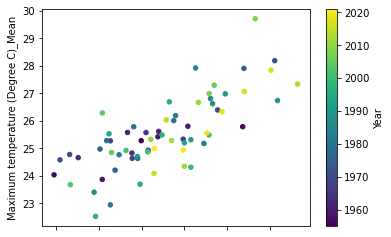

In [103]:
ax4 = adeMar.plot.scatter(x='Minimum temperature (Degree C)_Mean',y='Maximum temperature (Degree C)_Mean',c='Year',colormap="viridis")

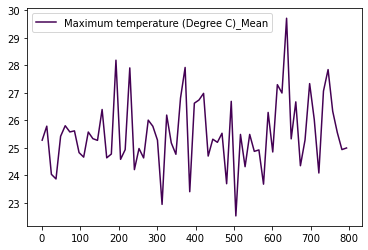

In [109]:
ax4 = adeMar.plot.line(y='Maximum temperature (Degree C)_Mean',colormap="viridis")

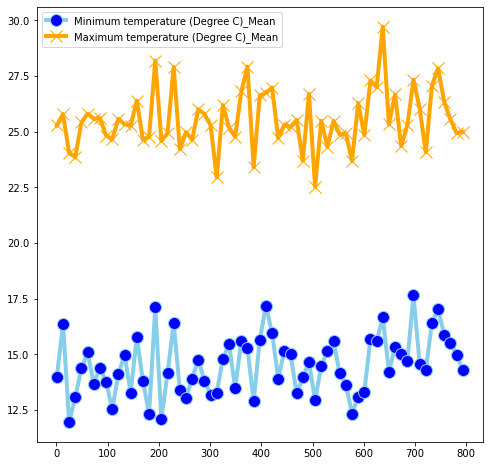

In [118]:
# multiple line plots
plt.figure(figsize=(8,8))
plt.plot( 'Minimum temperature (Degree C)_Mean', data=adeMar, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Maximum temperature (Degree C)_Mean', data=adeMar, marker='x', markerfacecolor='red', markersize=12, color='orange', linewidth=4)

# show legend
plt.legend()

# show graph
plt.show()

In [123]:
adeMarDay = ade.loc[ade['Month']==3]

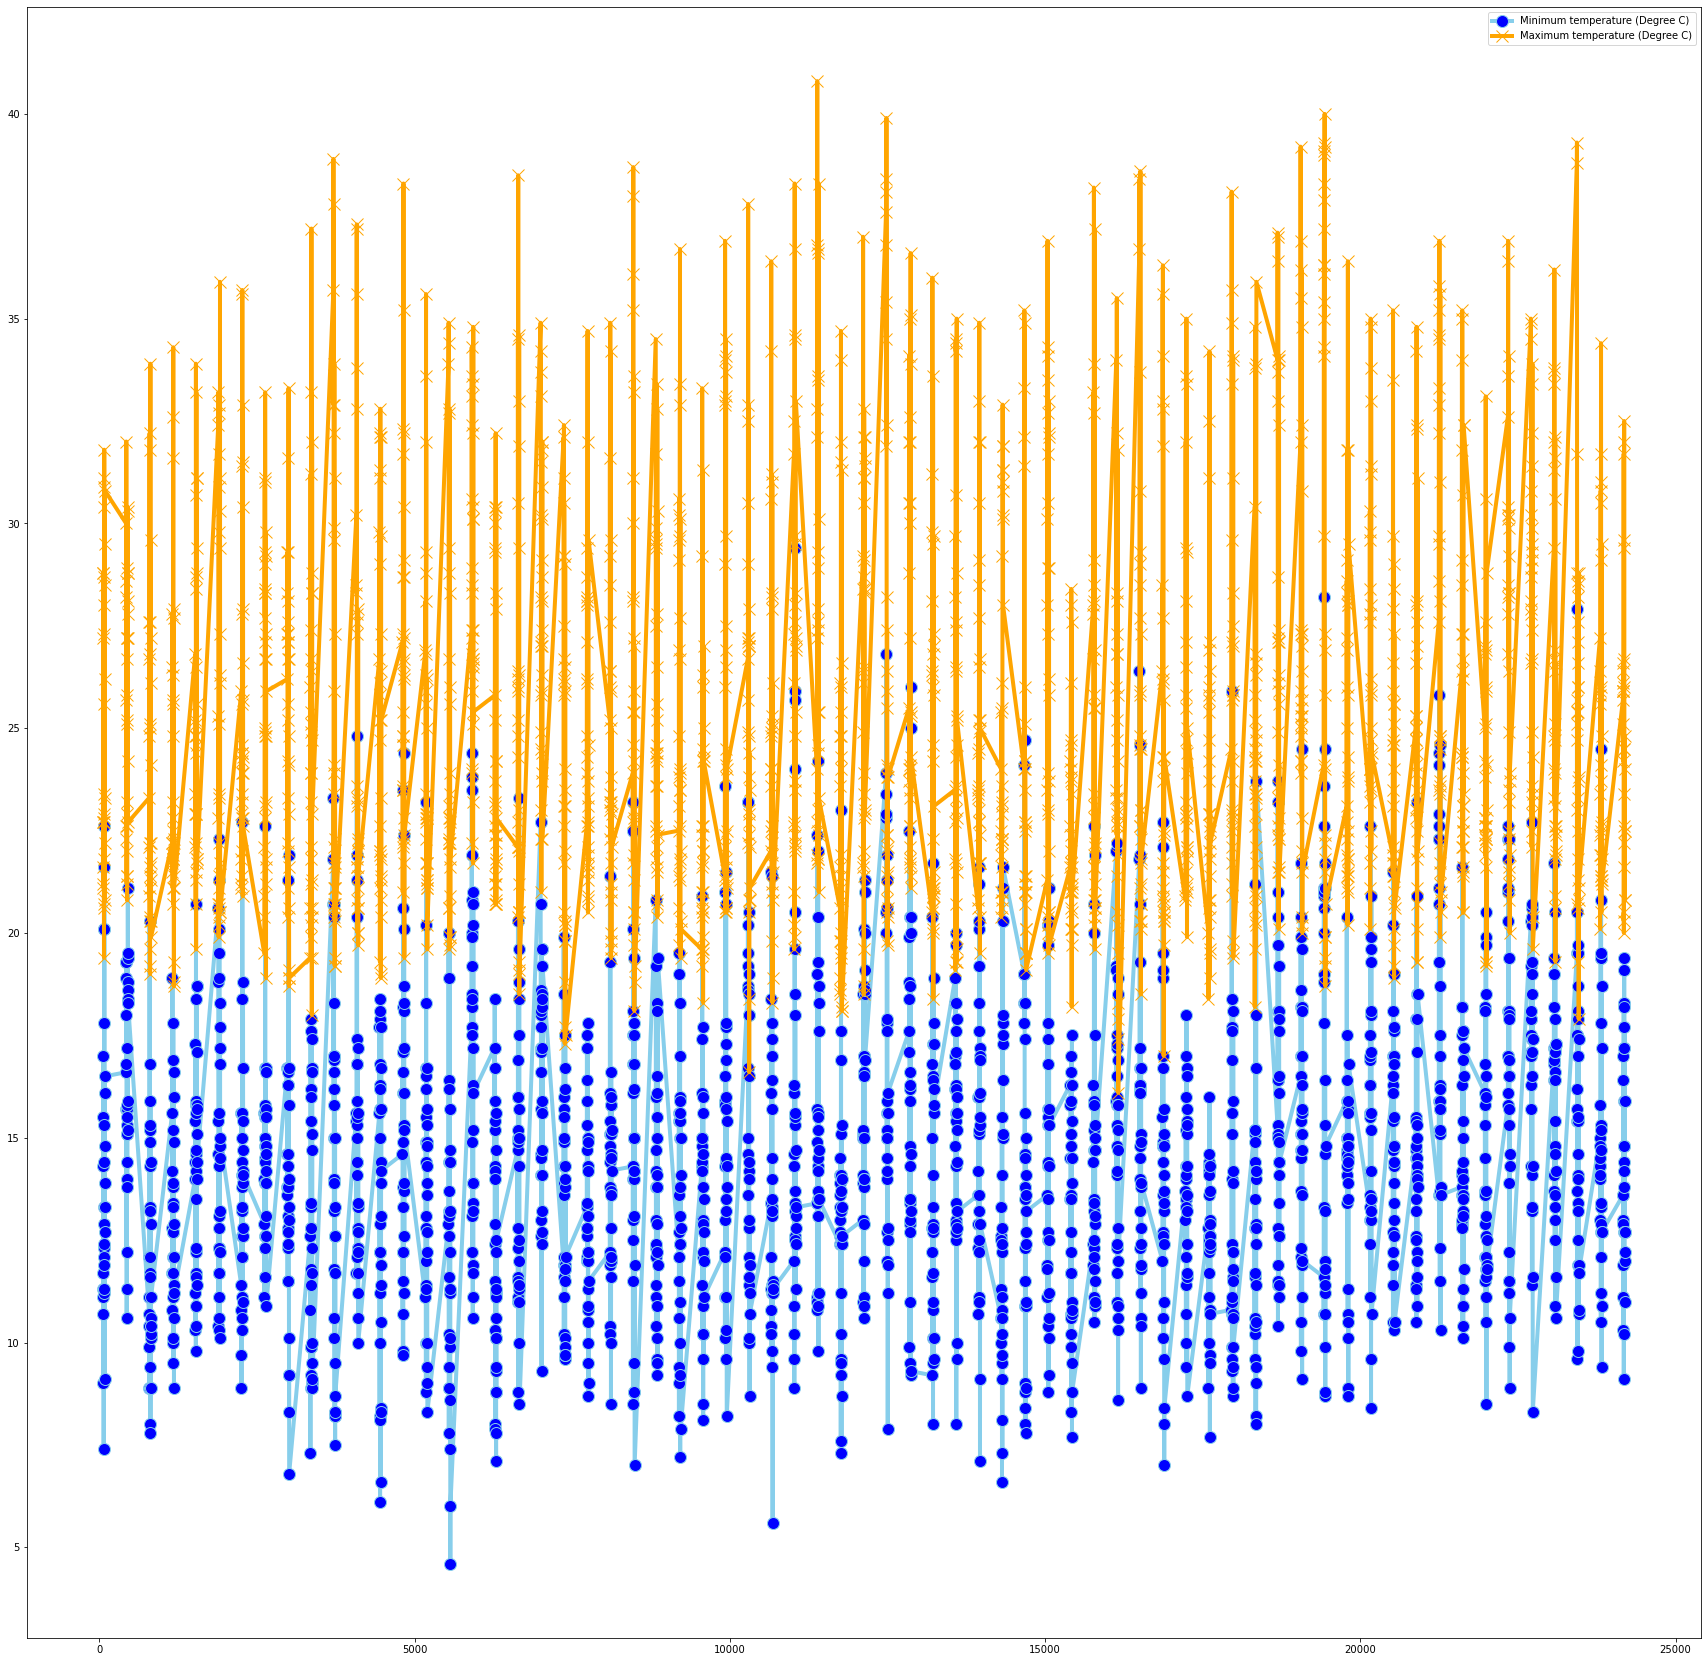

In [125]:
# multiple line plots
adeMarDay = ade.loc[ade['Month']==3]
plt.figure(figsize=(30,30))
plt.plot( 'Minimum temperature (Degree C)', data=adeMarDay, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.plot( 'Maximum temperature (Degree C)', data=adeMarDay, marker='x', markerfacecolor='red', markersize=12, color='orange', linewidth=4)

# show legend
plt.legend()

# show graph
plt.show()

In [130]:
ade.loc[(ade['Month'] ==3) & (ade['Year'] >1988)].mean()

Bureau of Meteorology station number_x         23034.000000
Year                                            2005.000000
Month                                              3.000000
Day                                               16.000000
Minimum temperature (Degree C)                    14.891593
Days of accumulation of minimum temperature        1.000000
Bureau of Meteorology station number_y         23034.000000
Maximum temperature (Degree C)                    25.665591
Days of accumulation of maximum temperature        1.000000
dtype: float64

In [134]:
for i in range(1,13):
    print(i)
    print(ade.loc[(ade['Month'] ==i) & (ade['Year'] <=1988)].mean())
    print(ade.loc[(ade['Month'] ==i) & (ade['Year'] >1988)].mean())

1
Bureau of Meteorology station number_x         23034.000000
Year                                            1972.000000
Month                                              1.000000
Day                                               16.000000
Minimum temperature (Degree C)                    15.435679
Days of accumulation of minimum temperature        1.000000
Bureau of Meteorology station number_y         23034.000000
Maximum temperature (Degree C)                    27.854154
Days of accumulation of maximum temperature        1.000000
dtype: float64
Bureau of Meteorology station number_x         23034.000000
Year                                            2005.000000
Month                                              1.000000
Day                                               16.000000
Minimum temperature (Degree C)                    16.817302
Days of accumulation of minimum temperature        1.000000
Bureau of Meteorology station number_y         23034.000000
Maximum temperature (De